### Control Baxter in Gazebo 
[ROS-Gazebo-Baxter simulation Installation Guide](http://enginius.tistory.com/739)

In [1]:
import rospy,rosnode,time,os
import tf # This is tf in ROS
import baxter_interface
import numpy as np
from baxter_interface import CHECK_VERSION
from IPython.display import Image
np.set_printoptions(precision=3)
print ("Packages loaded")

Packages loaded


#### Check existing ROS nodes

In [2]:
print ("ROS nodes:")
for _nIdx,_node in enumerate(rosnode.get_node_names()):
    print (" [%d] %s"%(_nIdx,_node))

ROS nodes:
 [0] /robot_state_publisher
 [1] /baxter_emulator
 [2] /baxter_sim_kinematics_left
 [3] /base_to_world
 [4] /rosout
 [5] /gazebo_gui
 [6] /baxter_sim_kinematics_right
 [7] /baxter_sim_io
 [8] /gazebo


#### Init ROS node

In [3]:
nodeName = 'baxter_ctrl'
rospy.init_node(nodeName)
print ("[%s] initialized."%(nodeName))

[baxter_ctrl] initialized.


#### Check ROS nodes so that '/baxter_ctrl' is properly initialized

In [4]:
print ("ROS nodes:")
for _nIdx,_node in enumerate(rosnode.get_node_names()):
    print (" [%d] %s"%(_nIdx,_node))

ROS nodes:
 [0] /robot_state_publisher
 [1] /baxter_emulator
 [2] /baxter_sim_kinematics_left
 [3] /base_to_world
 [4] /rosout
 [5] /gazebo_gui
 [6] /baxter_sim_kinematics_right
 [7] /baxter_ctrl
 [8] /baxter_sim_io
 [9] /gazebo


#### Initailize Baxter

In [5]:
rs = baxter_interface.RobotEnable(CHECK_VERSION)
rs.enable()
print ("Baxter is [%s]."%('ON' if rs.state().enabled else 'OFF'))

[INFO] [1533186154.830025, 24.101000]: Robot Enabled
Baxter is [ON].


#### Get left and right limbs of Baxter 

In [6]:
leftLimb = baxter_interface.Limb('left')
rightLimb = baxter_interface.Limb('right')
print ("Left limb joint names:")
for _nIdx,_name in enumerate(leftLimb.joint_names()):
    print (" [%d] %s"%(_nIdx,_name))
print ("Right limb joint names:")
for _nIdx,_name in enumerate(rightLimb.joint_names()):
    print (" [%d] %s"%(_nIdx,_name))

Left limb joint names:
 [0] left_s0
 [1] left_s1
 [2] left_e0
 [3] left_e1
 [4] left_w0
 [5] left_w1
 [6] left_w2
Right limb joint names:
 [0] right_s0
 [1] right_s1
 [2] right_e0
 [3] right_e1
 [4] right_w0
 [5] right_w1
 [6] right_w2


#### Get joint angles of Baxter

In [7]:
def get_jointAngles(_limb):
    cAngles = _limb.joint_angles()
    jointAngles = np.zeros(len(cAngles))
    for _nIdx,_name in enumerate(_limb.joint_names()):
        jointAngles[_nIdx] = 180/np.pi*cAngles[_name]
    return jointAngles

In [8]:
print ("Left limb joint values:")
print(get_jointAngles(leftLimb))
print ("Right limb joint values:")
print(get_jointAngles(rightLimb))

Left limb joint values:
[ 11.028  59.989  -0.977  28.362 -10.269   1.483  -0.777]
Right limb joint values:
[-15.636  59.989   1.438  28.593  -4.54    1.388   1.541]


#### Save image and plot

pics/baxter_initial_pose.png saved.


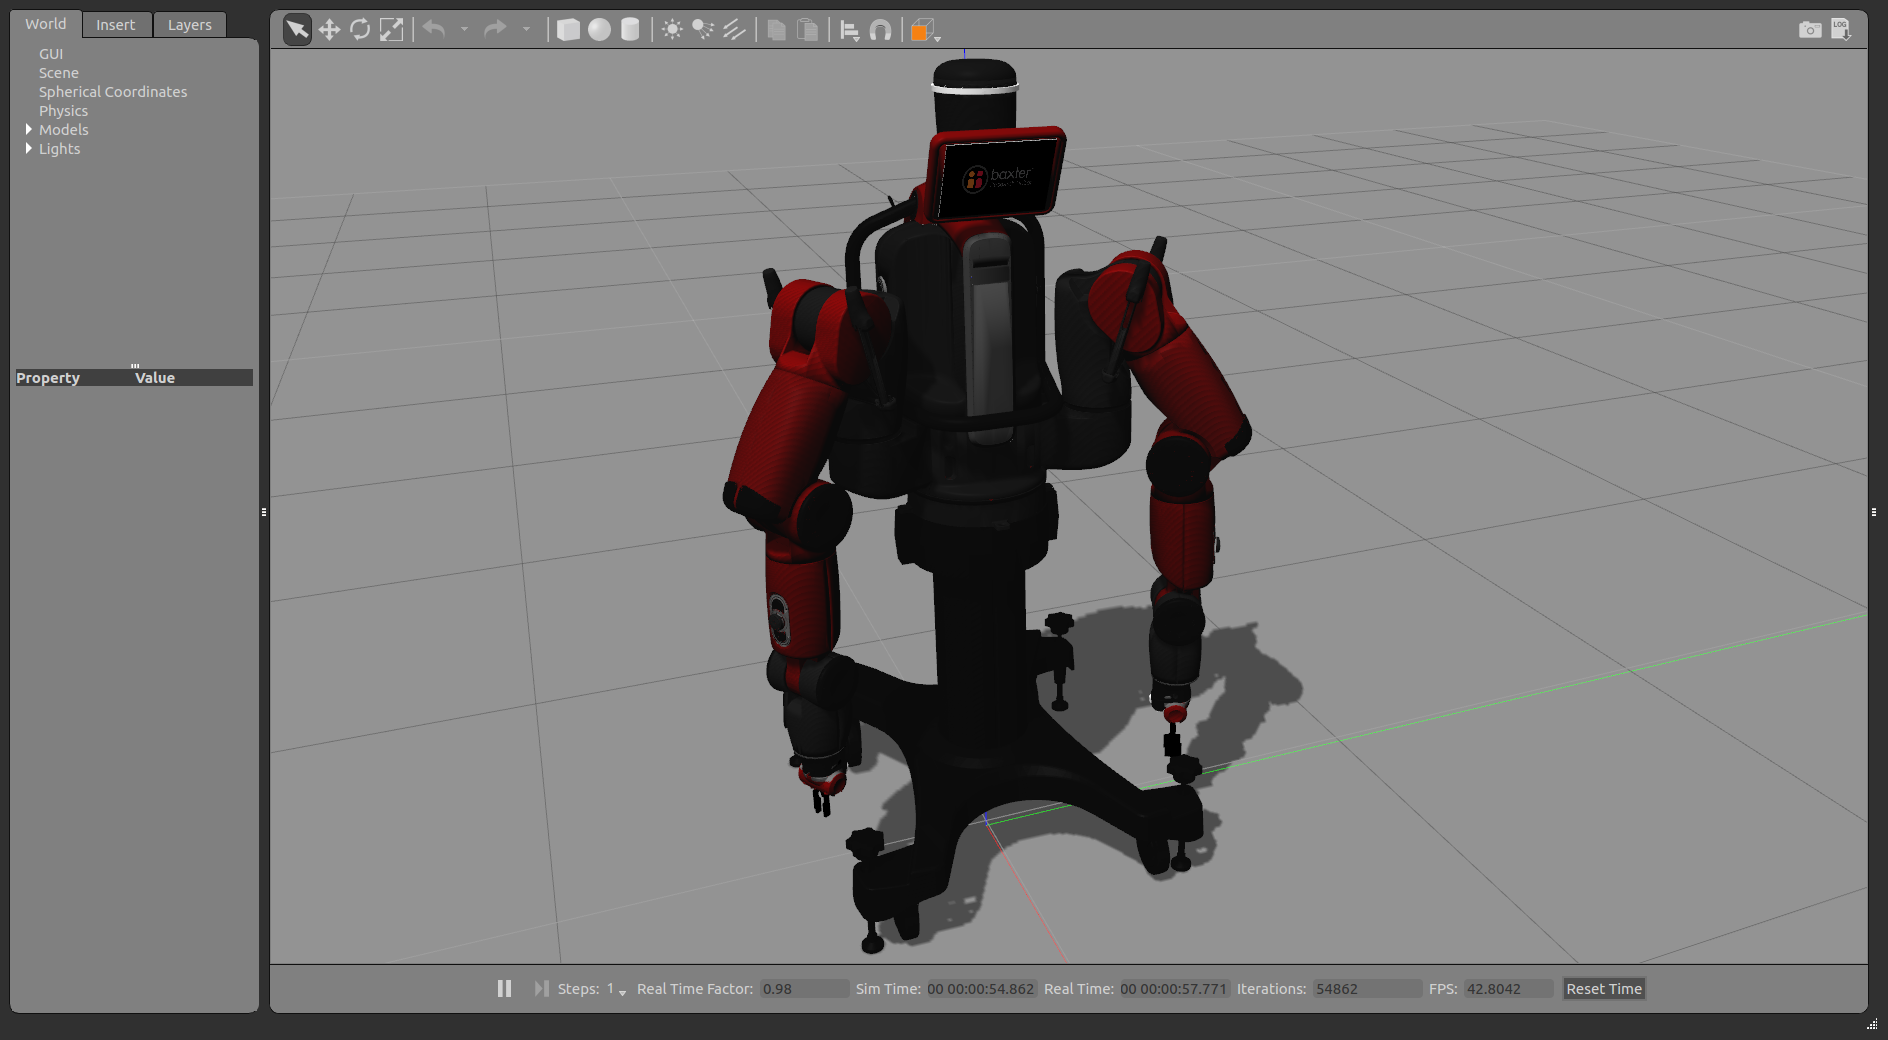

In [9]:
imgName = 'baxter_initial_pose'
os.system("./gazebo_screen.sh %s"%(imgName))
print ("pics/%s.png saved."%(imgName))
Image("pics/%s.png"%(imgName),width=600,height=300)

#### Get end-effector of Baxter

In [17]:
def get_ef(_limb):
    efP = _limb.endpoint_pose()['position']
    efQ = _limb.endpoint_pose()['orientation']
    efE = tf.transformations.euler_from_quaternion(efQ)
    # End-effector position
    efP = np.asarray([efP.x,efP.y,efP.z])
    # End-effector Euler angle
    efE = np.asarray(efE)*180.0/np.pi
    return efP,efQ,efE

In [18]:
leftEfP,leftEfQ,leftEfE = get_ef(leftLimb)
rightEfP,rightEfQ,rightEfE = get_ef(rightLimb)
print ("Left hand position:[%.2f,%.2f,%.2f] Euler angle:[%.2f,%.2f,%.2f]."%
       (leftEfP[0],leftEfP[1],leftEfP[2],leftEfE[0],leftEfE[1],leftEfE[2]))
print ("Right hand position:[%.2f,%.2f,%.2f] Euler angle:[%.2f,%.2f,%.2f]."%
       (rightEfP[0],rightEfP[1],rightEfP[2],rightEfE[0],rightEfE[1],rightEfE[2]))

Left hand position:[0.91,1.10,0.32] Euler angle:[179.26,89.98,-135.74].
Right hand position:[0.88,-1.08,0.32] Euler angle:[-178.09,89.98,136.91].


#### Control Baxter (random position)

In [12]:
def set_jointAngles(_limb,_jointAngles):
    cAngles = _limb.joint_angles() # Get current angle 
    for _nIdx,_name in enumerate(_limb.joint_names()):
        if _jointAngles[_nIdx] == -1:
            cAngles[_name] = cAngles[_name] # Don't change 
        else:
            cAngles[_name] = _jointAngles[_nIdx]*np.pi/180.0
    _limb.set_joint_positions(cAngles)

In [15]:
# Set zero position
set_jointAngles(leftLimb,np.zeros(7))
set_jointAngles(rightLimb,np.zeros(7))

#### Save image and plot

pics/baxter_zero_pose.png saved.


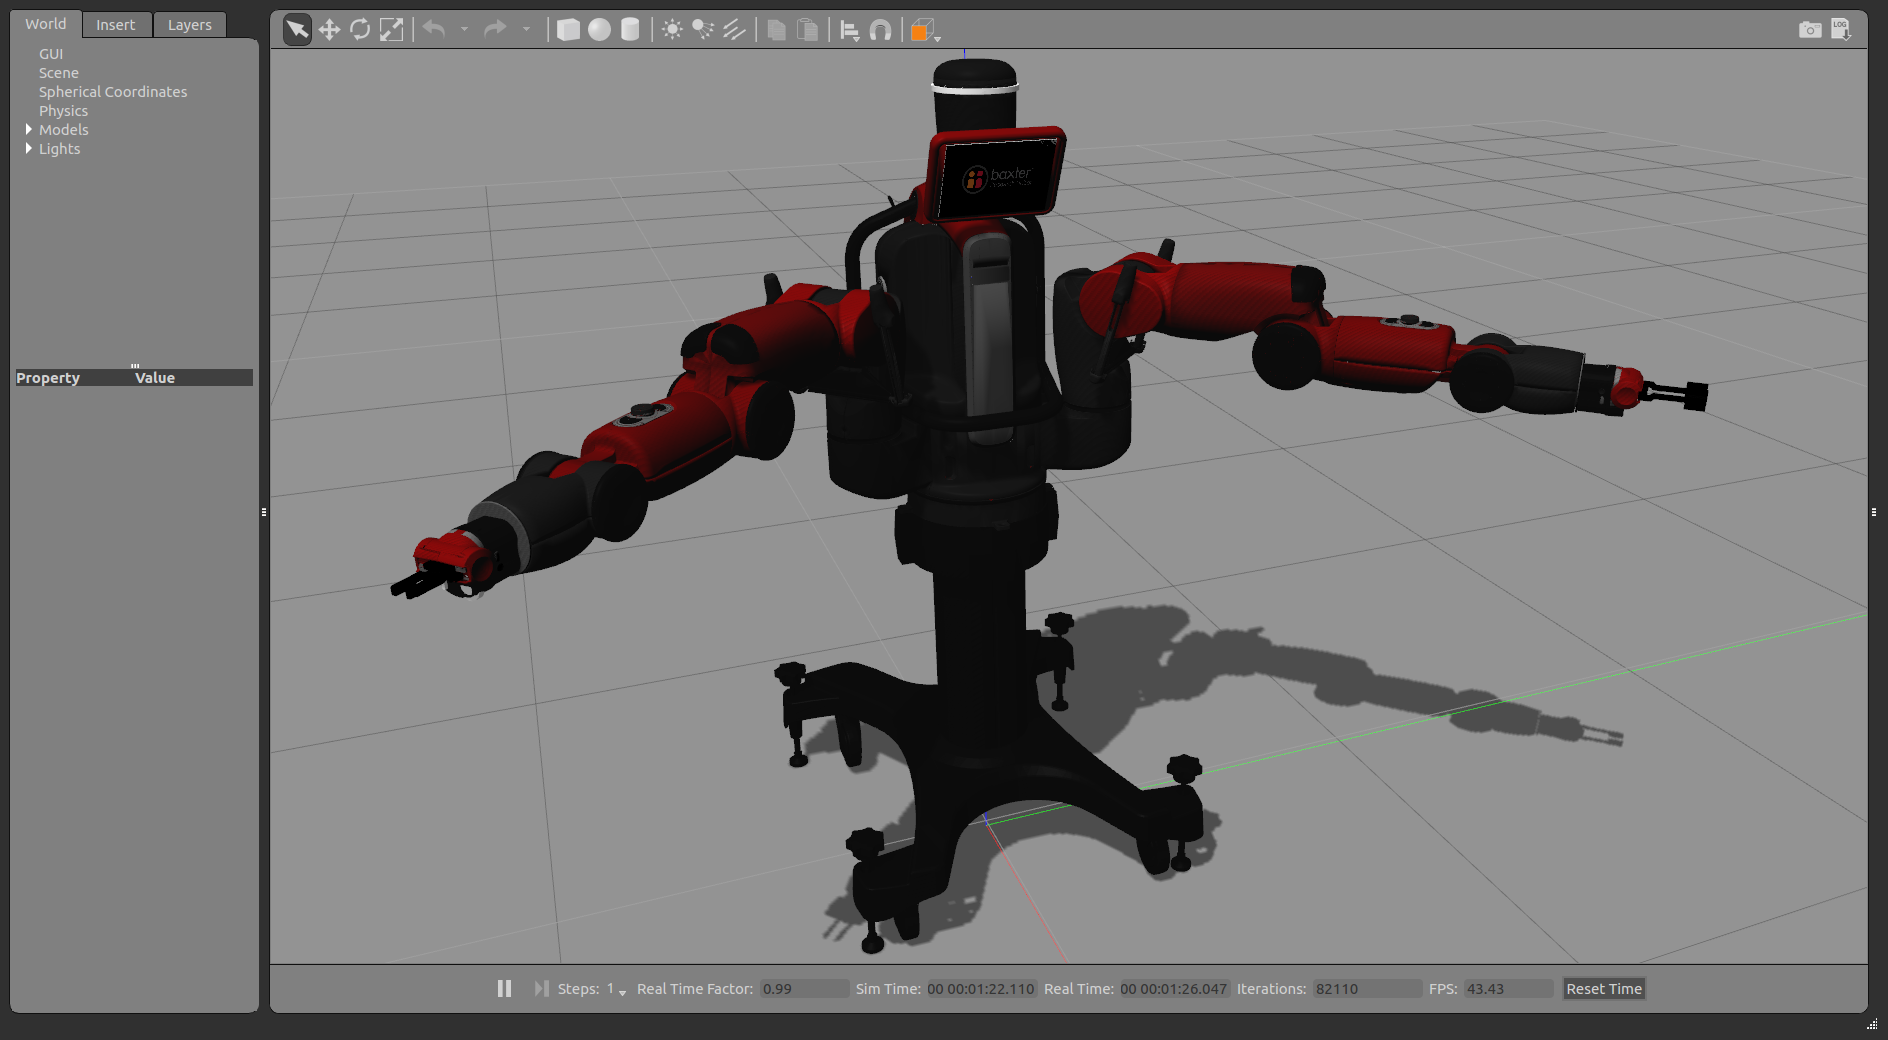

In [16]:
imgName = 'baxter_zero_pose'
os.system("./gazebo_screen.sh %s"%(imgName))
print ("pics/%s.png saved."%(imgName))
Image("pics/%s.png"%(imgName),width=600,height=300)

In [26]:
leftDegMin = np.array([-90,-90,-150,0,-90,-90,-90])
leftDegMax = np.array([90,70,150,120,90,90,90])
rightDegMin = np.array([-90,-90,-150,0,-90,-90,-90])
rightDegMax = np.array([90,70,150,120,90,90,90])

In [31]:
# Set random postion
randAngles = leftDegMin+(leftDegMax-leftDegMin)*np.random.rand(7)
set_jointAngles(leftLimb,randAngles)
randAngles = rightDegMin+(rightDegMax-rightDegMin)*np.random.rand(7)
set_jointAngles(rightLimb,randAngles)

pics/baxter_rand_pose.png saved.


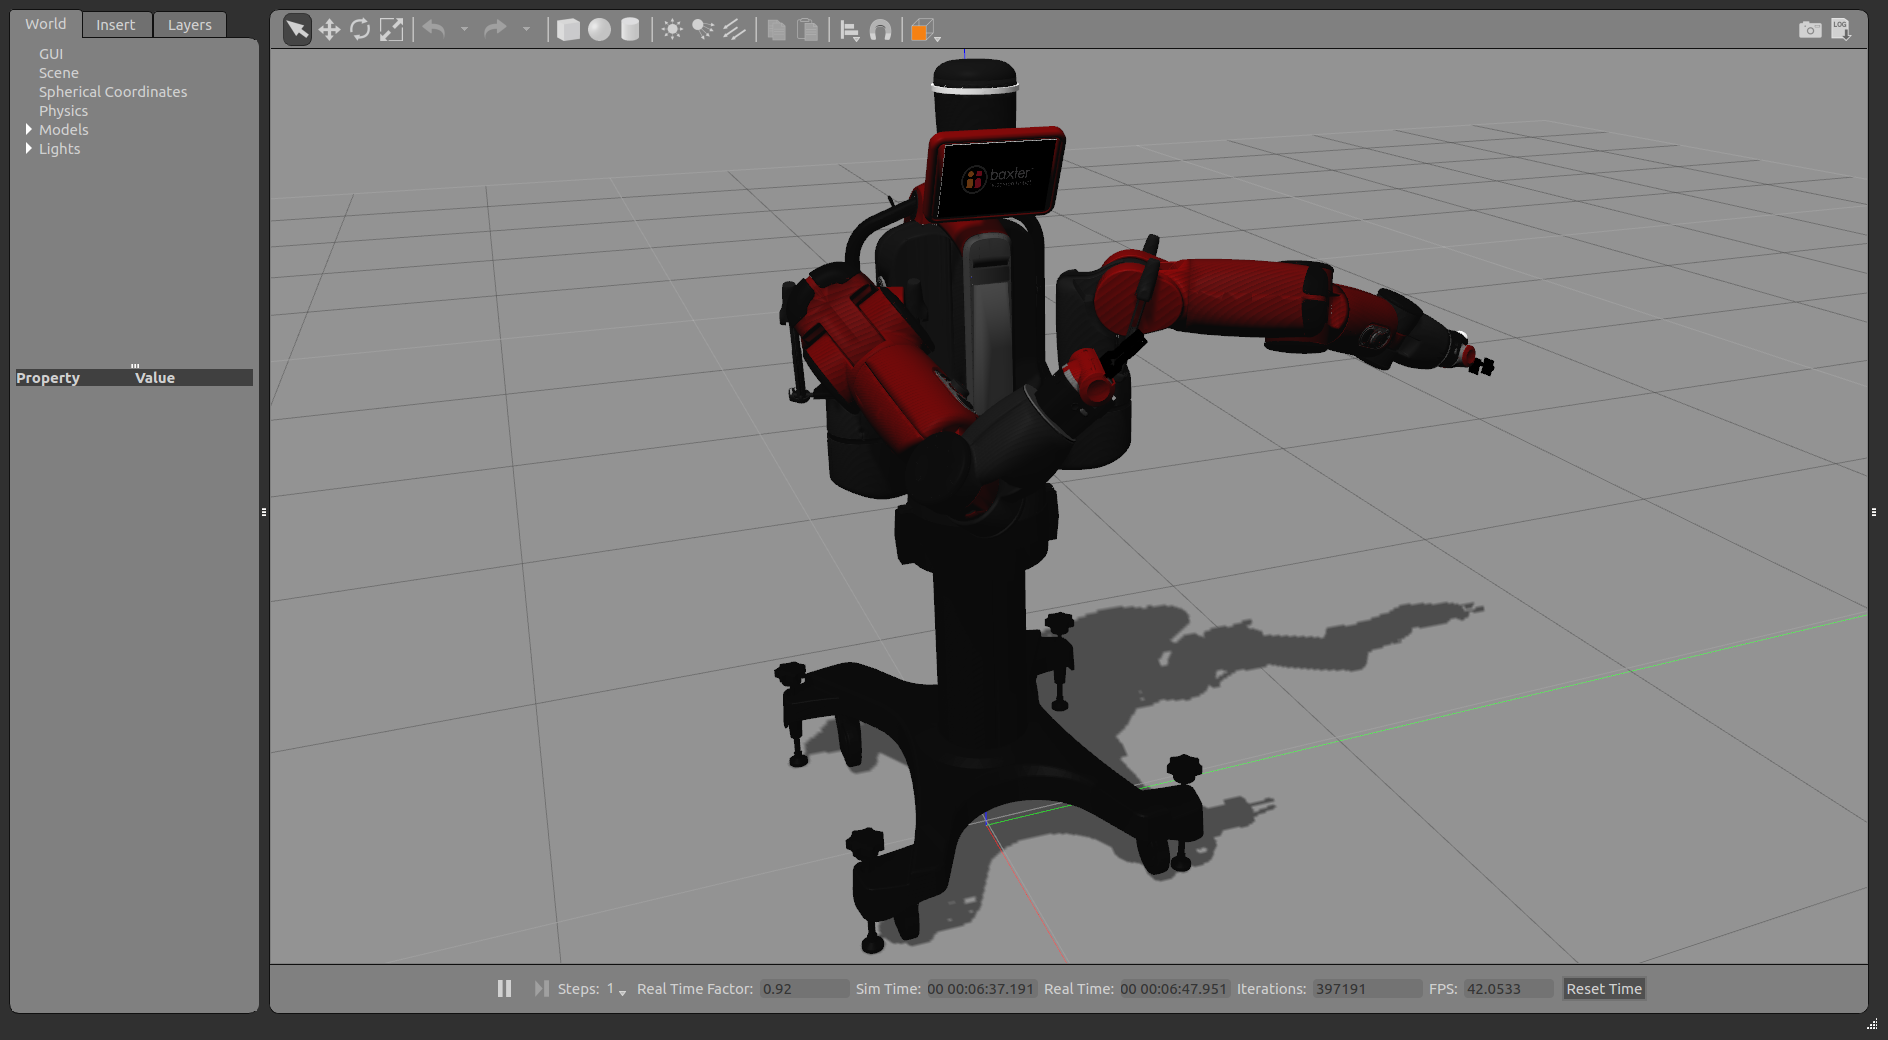

In [32]:
imgName = 'baxter_rand_pose'
os.system("./gazebo_screen.sh %s"%(imgName))
print ("pics/%s.png saved."%(imgName))
Image("pics/%s.png"%(imgName),width=600,height=300)

In [33]:
# Change one joint of right angle at a time 
angles = 0*np.ones(7)
angles[1] = -30
set_jointAngles(leftLimb,angles)
set_jointAngles(rightLimb,angles)

pics/baxter_pose_1.png saved.


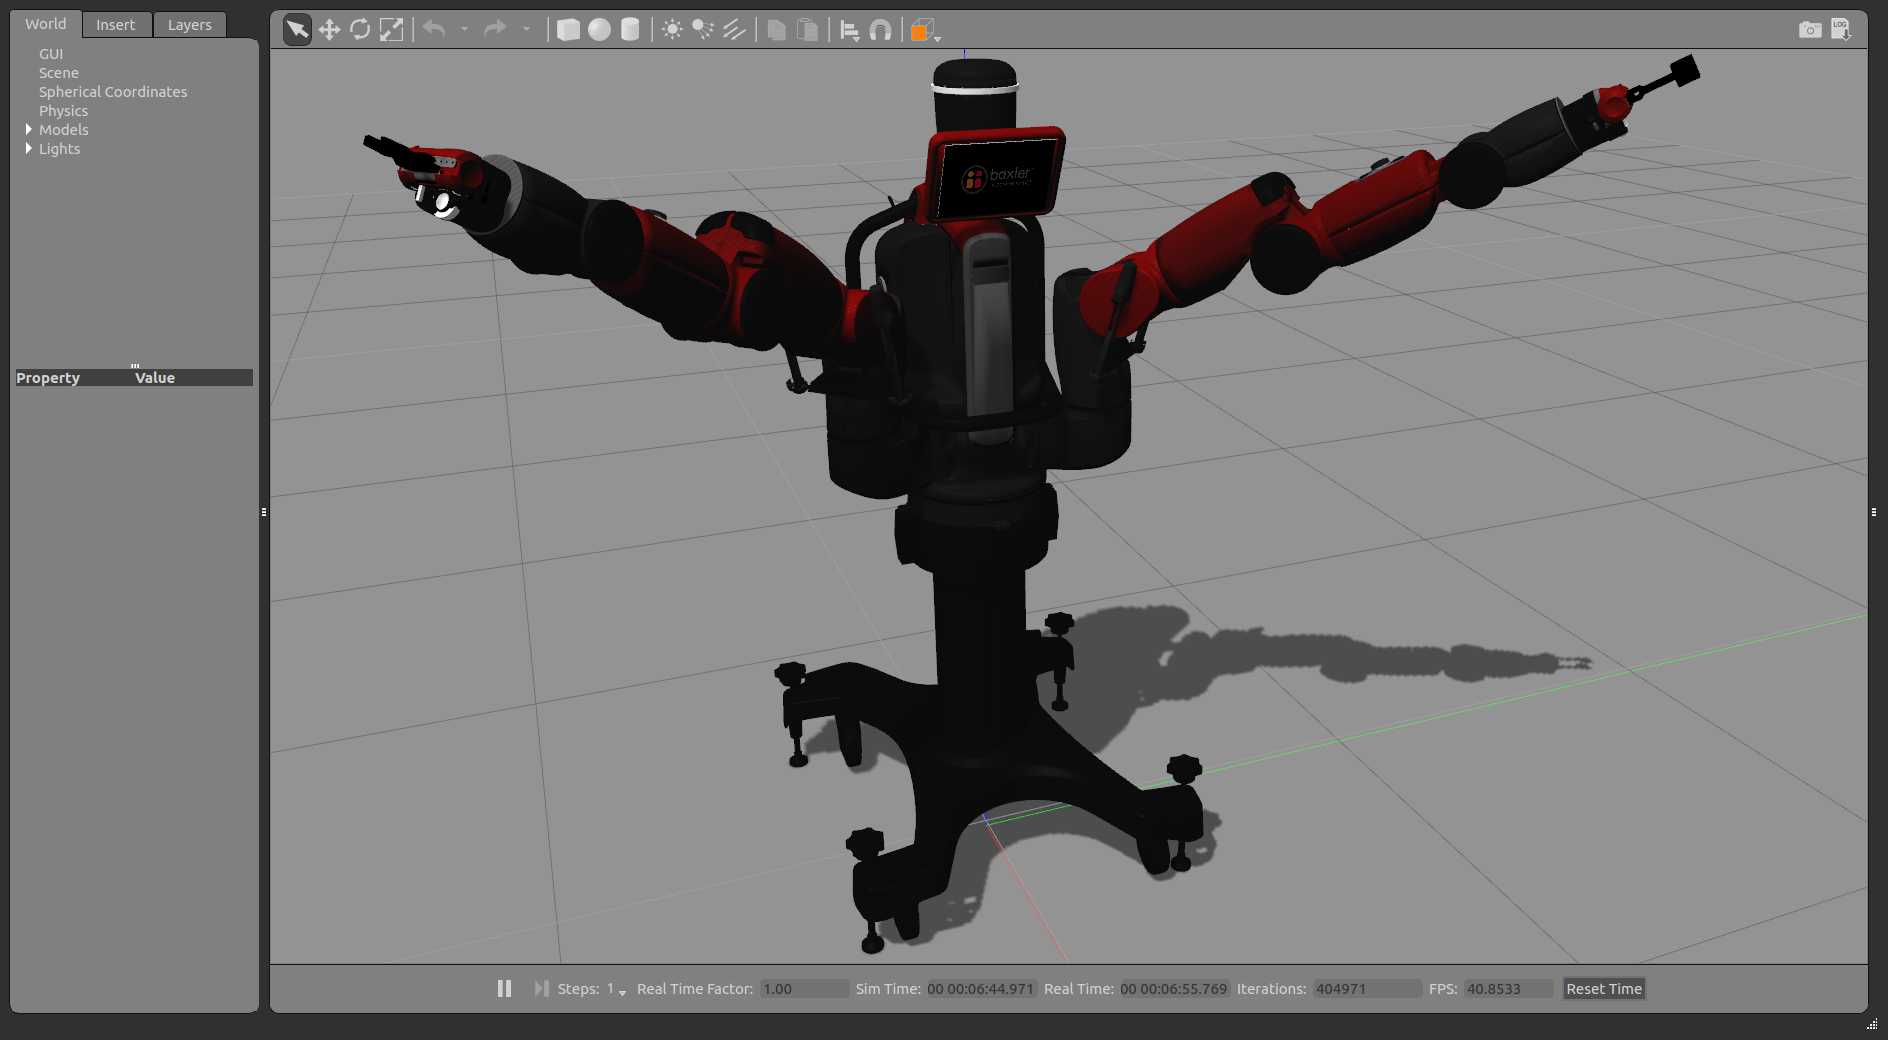

In [34]:
imgName = 'baxter_pose_1'
os.system("./gazebo_screen.sh %s"%(imgName))
print ("pics/%s.png saved."%(imgName))
Image("pics/%s.png"%(imgName),width=600,height=300)